In [2]:
import os 
import sys
from dotenv import load_dotenv
from importlib import reload

src_path = os.path.abspath("../src")
sys.path.append(src_path)

In [ ]:
load_dotenv("../src/.env")

src_path = os.path.abspath("../src")
sys.path.append(src_path)

import droughtEKTE as d

reload(d)

d.new_file()

Creating new file
Files in ZIP: ['soil_data.csv', 'test_timeseries/test_timeseries.csv', 'train_timeseries/train_timeseries.csv', 'validation_timeseries/validation_timeseries.csv']
First rows in the filtered dataset:    fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  \
0  1001  2000-01-01     0.22  100.51   9.65  14.74   13.51   13.51    20.96   
1  1001  2000-01-02     0.20  100.55  10.42  16.69   14.71   14.71    22.80   
2  1001  2000-01-03     3.65  100.15  11.76  18.49   16.52   16.52    22.73   
3  1001  2000-01-04    15.95  100.29   6.42  11.40    6.09    6.10    18.09   
4  1001  2000-01-05     0.00  101.15   2.95   3.86   -3.29   -3.20    10.82   

   T2M_MIN  ...     TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  WS50M  \
0    11.46  ...  14.65   2.20       2.94       1.49         1.46   4.85   
1    12.61  ...  16.60   2.52       3.43       1.83         1.60   5.33   
2    15.32  ...  18.41   4.03       5.33       2.66         2.67   7.53   
3     2.

In [ ]:
import pandas as pd

load_dotenv("../src/.env")

src_path = os.path.abspath("../src")
sys.path.append(src_path)

import drought_clean as dc

reload(dc)

df = pd.read_csv("../data/filtered1_data.csv")
min_temp = -50
max_temp = 50

dc.check_unrealistic_temperature(df, min_temp, max_temp)

'No unrealistic temperature values found. No need to adjust any rows.'

In [ ]:
import pandas as pd

load_dotenv("../src/.env")

src_path = os.path.abspath("../src")
sys.path.append(src_path)

import drought_clean as dc

reload(dc)

df = pd.read_csv("../data/filtered1_data.csv")
fips_codes = [1001, 1003, 1005]

dc.replace_to_csv(df, fips_codes)

'New file created with replaced values.'

In [ ]:
import pandas as pd

src_path = os.path.abspath("../src")
sys.path.append(src_path)

import drought_clean as dc

reload(dc)


df = dc.df
fips_codes = dc.fips_codes

print(dc.find_median(df, fips_codes))
print(dc.find_mean_value(df, fips_codes))

Columns available for median calculation: ['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'score']
Available FIPS codes: [1001, 1003, 1005]
        T2M  T2M_MIN
fips                
1001  18.73   12.865
1005  19.59   13.735
Columns available for mean value calculation: ['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'score']
Available FIPS codes: [1001, 1003, 1005]
      PRECTOT      PS  T2MWET
fips                         
1001     3.66  100.29   12.67
1003     4.08  101.33   15.45


FIPS-code: 1001
Correlation value: -0.27
P-value: 0.0000000000
Result: Weak correlation | Significant
FIPS-code: 1003
Correlation value: -0.33
P-value: 0.0000000000
Result: Moderate correlation | Significant
FIPS-code: 1005
Correlation value: -0.33
P-value: 0.0000000000
Result: Moderate correlation | Significant
[-0.27, -0.33, -0.33]


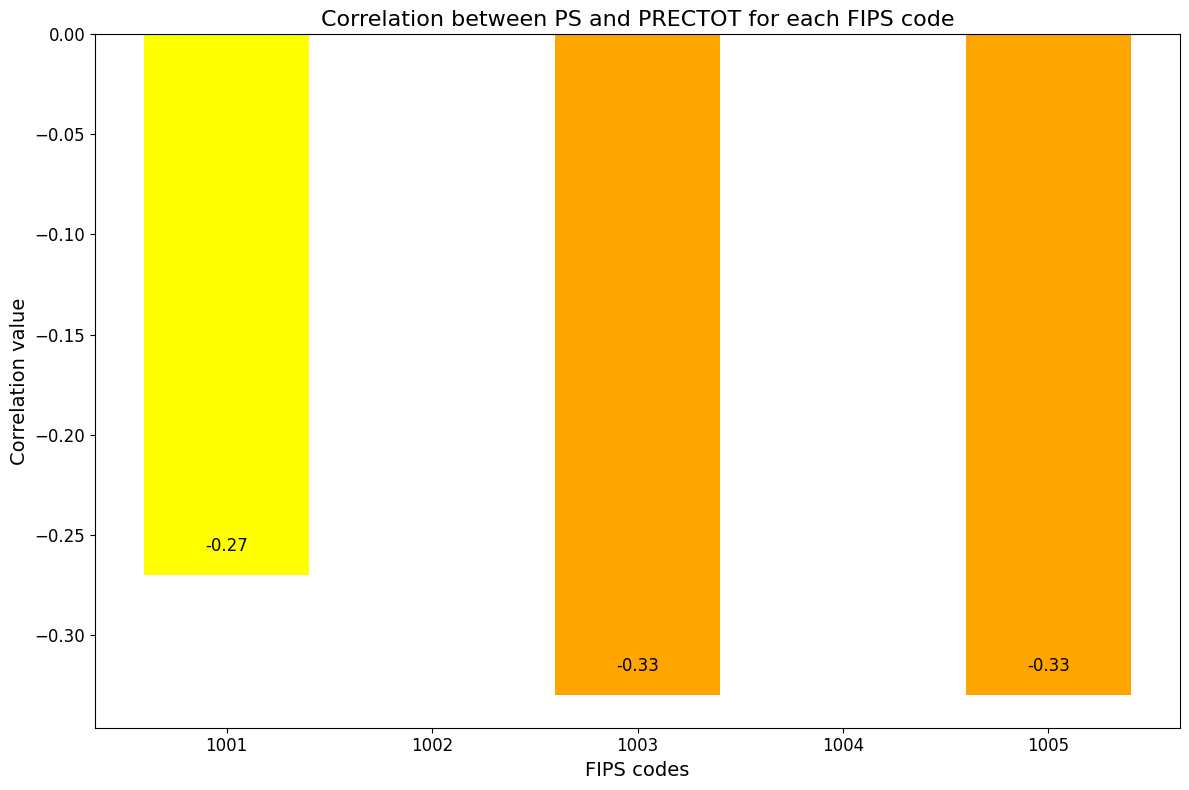

In [45]:
import drought_stat_analysis as dsa

df = dsa.df
reload(dsa)

corr_values = dsa.corr_analysis(df, fips_codes, "PS", "PRECTOT")
print(corr_values)
dsa.visualize_corr(fips_codes, corr_values, "PS", "PRECTOT")

{1001: {'PRECTOT': 0.12, 'PS': -0.42, 'QV2M': 0.89, 'T2MDEW': 0.91, 'T2MWET': 0.91, 'T2M_MAX': 0.95, 'T2M_MIN': 0.95, 'T2M_RANGE': -0.08, 'TS': 0.99, 'WS10M': -0.4, 'WS10M_MAX': -0.38, 'WS10M_MIN': -0.28, 'WS10M_RANGE': -0.29, 'WS50M': -0.37, 'WS50M_MAX': -0.4, 'WS50M_MIN': -0.22, 'WS50M_RANGE': -0.19}, 1003: {'PRECTOT': 0.11, 'PS': -0.57, 'QV2M': 0.94, 'T2MDEW': 0.95, 'T2MWET': 0.95, 'T2M_MAX': 0.98, 'T2M_MIN': 0.98, 'T2M_RANGE': -0.25, 'TS': 1.0, 'WS10M': -0.36, 'WS10M_MAX': -0.33, 'WS10M_MIN': -0.29, 'WS10M_RANGE': -0.17, 'WS50M': -0.33, 'WS50M_MAX': -0.36, 'WS50M_MIN': -0.25, 'WS50M_RANGE': -0.15}, 1005: {'PRECTOT': 0.08, 'PS': -0.49, 'QV2M': 0.91, 'T2MDEW': 0.93, 'T2MWET': 0.93, 'T2M_MAX': 0.98, 'T2M_MIN': 0.98, 'T2M_RANGE': -0.09, 'TS': 1.0, 'WS10M': -0.33, 'WS10M_MAX': -0.31, 'WS10M_MIN': -0.27, 'WS10M_RANGE': -0.23, 'WS50M': -0.33, 'WS50M_MAX': -0.36, 'WS50M_MIN': -0.22, 'WS50M_RANGE': -0.18}}
Available FIPS codes: [1001, 1003, 1005]


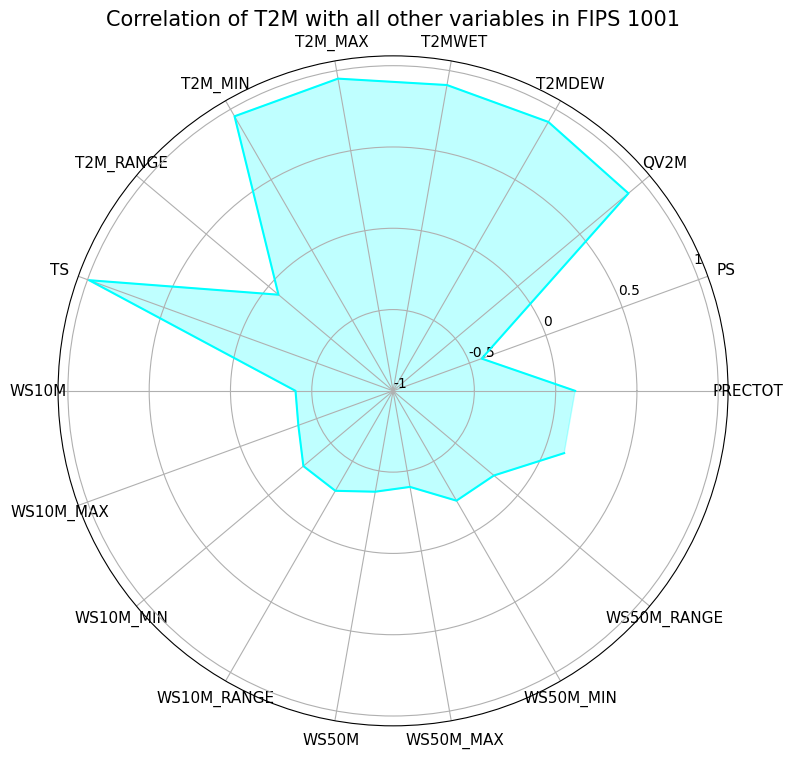

Visualiztion complete for T2M with FIPS 1001.


In [6]:
import drought_stat_analysis as dsa

df = dsa.df
fips_codes = dsa.fips_codes
reload(dsa)

ignored_cols = dsa.ignored_cols

all_corr = dsa.corr_var1_and_rest(df, fips_codes, "T2M", exclude=ignored_cols)
print(all_corr)
print(dsa.visualize_corr_var1_and_rest(all_corr, fips_codes, "T2M"))